# Goals

We want to analyaze the current feelings of people towards NFT as it is a thriving trend right now.\
More and more peoeple like artist, singer or even office worker are interested in this domain. 

However, the free twitter api can only scrape the tweets that created 7 days ago.\
At first we want to look for the difference before and after 2021 as we have done the EDA project for NFT and we can see that the boom is started at 2021. But is still fine to take a closer look on it.


In [14]:
# Importing neccessary libraries
import tweepy
from textblob import TextBlob 
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import os
import plotly.express as px
import datetime
plt.style.use('fivethirtyeight')

In [15]:
pwd = os.getcwd()

In [16]:
# Store the filepath
filepath = os.path.join(pwd, "Login.csv")

In [17]:
# Store the data
log = pd.read_csv(filepath)

In [18]:
# Get the Twitter API credentials
consumerKey = log['key'][0]
consumerSercret = log['key'][1]
accessToken = log['key'][2]
accessTokenSercret = log['key'][3]

In [21]:
# Create the authentication object 
authenticate = tweepy.OAuthHandler(consumerKey, consumerSercret)
# Set the access token and the access token sercret 
authenticate.set_access_token(accessToken, accessTokenSercret)
# Create the API object
api = tweepy.API(authenticate, wait_on_rate_limit = True)


In [26]:
# Gather the 400 tweets about NFT and filter out any retweets 'RT'
search_term = '#nft -filter:retweets'
# Create a cursor object
tweets = tweepy.Cursor(api.search_tweets, q=search_term, lang = 'en', tweet_mode = 'extended').items(400)
# Store the tweets ina variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [27]:
# Create a dataframe to store the tweets with a columns called 'Tweets'
df = pd.DataFrame(all_tweets, columns = ['Tweets'])
# Showing the first 10 rows of data
df.head()
df

,Tweets
0,DeGod #6969 (Rank #5622) just sold for 60.00 S...
1,InternetFren #8888 purchased by evanchoi for 0...
2,"It's my nft drawing, and more wizards will app..."
3,The team is very trustworthy &amp; their visio...
4,Get ready for the next adventure into Web 3.0 ...
...,...
395,@matryoshkalabs Check out https://t.co/wKu2z78...
396,Wonderful project. This project is top listed....
397,🚨Important information🚨\n\nWe present the rele...
398,Gutter Juice #6899 has been purchased by UFO42...


In [28]:
# Create a function to clean the tweets 
def cleanTwt(twt):
    twt =  re.sub('#nft', 'nft', twt) # removes the '# from nft
    twt = re.sub('#NFT', 'nft', twt) # removes the '#' from NFT
    twt = re.sub('#[A-Za-z0-9]+', '',twt) # removes any strings with a '#'
    twt = re.sub('\\n', '',twt) # removes the '\n' string
    twt = re.sub('https?:\/\/\S+', '',twt) # removes any hyperlinks
    return twt

In [29]:
# Clean the tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
# Show the data set
df.head()

,Tweets,Cleaned_Tweets
0,DeGod #6969 (Rank #5622) just sold for 60.00 S...,DeGod (Rank ) just sold for 60.00 S◎L ($5476....
1,InternetFren #8888 purchased by evanchoi for 0...,InternetFren purchased by evanchoi for 0.019 ...
2,"It's my nft drawing, and more wizards will app...","It's my nft drawing, and more wizards will app..."
3,The team is very trustworthy &amp; their visio...,The team is very trustworthy &amp; their visio...
4,Get ready for the next adventure into Web 3.0 ...,Get ready for the next adventure into Web 3.0 ...


### Subjectivity

The higher subjectivity means that the text contains personal opinion rather than factual information. \
It lies between 0 and 1.

### Polarity 

Polarity score can qunatify the sentence with a positie or negative value.\
It refers to the text is expressing the positive, negative or neutral sentiment by the user.\
It lies between -1 to 1.

By doing these, we can understnd the text like what is the overall feeling or opinion people are expressing.


In [30]:
# Create a function to get the subjectivity
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity
 # Create a functoin to get the polarity   
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

# Create two new columns called 'subjectivity' & 'polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

# Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,DeGod #6969 (Rank #5622) just sold for 60.00 S...,DeGod (Rank ) just sold for 60.00 S◎L ($5476....,0.900000,-0.800000
1,InternetFren #8888 purchased by evanchoi for 0...,InternetFren purchased by evanchoi for 0.019 ...,0.000000,0.000000
2,"It's my nft drawing, and more wizards will app...","It's my nft drawing, and more wizards will app...",0.541667,0.333333
3,The team is very trustworthy &amp; their visio...,The team is very trustworthy &amp; their visio...,0.341667,0.150000
4,Get ready for the next adventure into Web 3.0 ...,Get ready for the next adventure into Web 3.0 ...,0.250000,0.100000


In [32]:
# Create a function to get the text sentiment 
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [33]:
# Create a column to store the text sentiment
df['sentiment'] = df["Polarity"].apply(getSentiment)
# Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,sentiment
0,DeGod #6969 (Rank #5622) just sold for 60.00 S...,DeGod (Rank ) just sold for 60.00 S◎L ($5476....,0.900000,-0.800000,Negative
1,InternetFren #8888 purchased by evanchoi for 0...,InternetFren purchased by evanchoi for 0.019 ...,0.000000,0.000000,Neutral
2,"It's my nft drawing, and more wizards will app...","It's my nft drawing, and more wizards will app...",0.541667,0.333333,Positive
3,The team is very trustworthy &amp; their visio...,The team is very trustworthy &amp; their visio...,0.341667,0.150000,Positive
4,Get ready for the next adventure into Web 3.0 ...,Get ready for the next adventure into Web 3.0 ...,0.250000,0.100000,Positive


In [97]:
fig = px.bar(df,x = df.value_counts('sentiment'), y =  ['Positive', 'Neutral', 'Negative'],
            labels = {'x' : 'Number of Tweets',
              'y' : 'Sentiment'},
    title ='Sentiment Analysis Bar Plot')

fig.update_layout(
width=650,
height=400)

fig.show()

From this bar plot, we can see that most the people (about 90%) tweets are neutral and positive. And the number of neutral tweets are about three-fourths the number of positive tweets. And only 10% of them are negative.

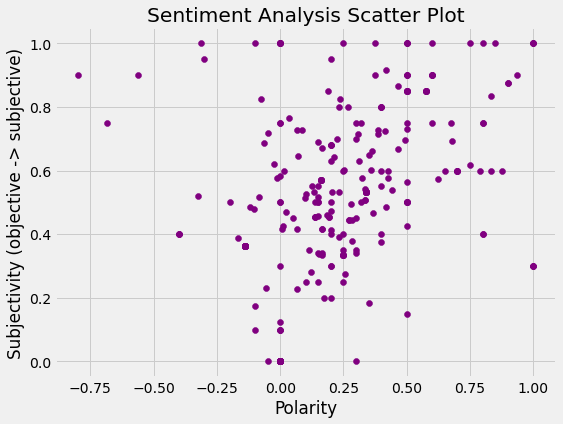

In [99]:
# Create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Purple')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel("Polarity")
plt.ylabel('Subjectivity (objective -> subjective)')
plt.show()

As if the dot is very close to the right hand corner, the tweet would be very positive and subjective.\
From the plot, we can see that the majority of tweets are around the positive and neutral area. 
Not a lot is located at negative area.

And as if it is negative tweets, it also has a relatively high sujectivity score too which means it is negative and also subjective. 

## What's next

We could apply NLP to see is there any characteristic of what comment or feelings they have towards NFT?
